In [1]:
import copy
import os
import sys
import time

import jax
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from helper import df_to_latex, fig_path, set_figsize, tab_path
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Import code from src
sys.path.insert(0, '../nqs/')
import nqs  # noqa

# Set plot and dataframe style
sns.set(context="paper", style='darkgrid', rc={"axes.facecolor": "0.96"})

fontsize = "large"
params = {"font.family": "serif",
          "font.sans-serif": ["Computer Modern"],
          "axes.labelsize": fontsize,
          "legend.fontsize": fontsize,
          "xtick.labelsize": fontsize,
          "ytick.labelsize": fontsize,
          "legend.handlelength": 2
          }

plt.rcParams.update(params)
plt.rc('text', usetex=True)

pd.set_option('display.max_columns', 50)

jax.config.update("jax_enable_x64", True)
jax.config.update('jax_platform_name', 'cpu')

In [2]:
df_rwm_1000 = pd.read_csv("../data/nhidden_rwm_batch1000.csv")
df_rwm_1000

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.500002,0.000004,8.093931e-07,0.278867,1.463795e-06,1.879100e-08,4.007921e-09,0.000302,1,1,0.5,3.0,1,1,rwm,262144,500000,1000
1,0.499999,0.000003,5.280744e-07,0.279006,6.214691e-07,1.763923e-08,4.641366e-09,0.000367,1,1,0.5,3.0,1,2,rwm,262144,500000,1000
2,0.500006,0.000010,3.967186e-06,0.279178,2.601180e-06,5.597922e-08,1.754497e-08,0.000252,1,1,0.5,3.0,1,3,rwm,262144,500000,1000
3,0.500005,0.000010,4.608456e-06,0.279150,5.344153e-06,6.423590e-08,5.767736e-08,0.000285,1,1,0.5,3.0,1,4,rwm,262144,500000,1000


In [3]:
df_rwm_5000 = pd.read_csv("../data/nhidden_rwm_batch5000.csv")
df_rwm_5000

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.499996,0.000020,0.000018,0.278393,0.000003,1.141555e-07,7.507478e-08,0.000266,1,1,0.5,3.0,1,1,rwm,262144,500000,5000
1,0.499999,0.000006,0.000002,0.278522,0.000003,3.354788e-08,8.442674e-09,0.000422,1,1,0.5,3.0,1,2,rwm,262144,500000,5000
2,0.500039,0.000043,0.000076,0.280505,0.000017,3.311509e-07,3.900822e-07,0.000349,1,1,0.5,3.0,1,3,rwm,262144,500000,5000
3,0.500117,0.000065,0.000197,0.280433,0.000036,1.195663e-06,4.691844e-06,0.000495,1,1,0.5,3.0,1,4,rwm,262144,500000,5000


In [4]:
df_lmh_1000 = pd.read_csv("../data/nhidden_lmh_batch1000.csv")
df_lmh_1000

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.500000,1.100984e-07,1.066139e-09,0.578605,2.547295e-08,3.516472e-10,4.163483e-12,0.000181,1,1,0.5,1.3,1,1,lmh,262144,500000,1000
1,0.499996,3.948038e-06,1.373793e-06,0.579138,1.372169e-06,2.268068e-08,2.910752e-09,0.000330,1,1,0.5,1.3,1,2,lmh,262144,500000,1000
2,0.499986,1.054685e-05,1.001056e-05,0.580447,4.431876e-06,1.497322e-07,4.155291e-08,0.000313,1,1,0.5,1.3,1,3,lmh,262144,500000,1000
3,0.499978,1.345569e-05,1.688025e-05,0.580699,4.271061e-06,5.366542e-08,8.331911e-08,0.000519,1,1,0.5,1.3,1,4,lmh,262144,500000,1000


In [5]:
df_lmh_5000 = pd.read_csv("../data/nhidden_lmh_batch5000.csv")
df_lmh_5000

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.499996,0.000012,0.000017,0.580307,0.000003,8.058159e-08,4.131759e-08,0.000313,1,1,0.5,1.3,1,1,lmh,262144,500000,5000
1,0.499999,0.000007,0.000005,0.579507,0.000002,2.851024e-08,1.730145e-08,0.000178,1,1,0.5,1.3,1,2,lmh,262144,500000,5000
2,0.499986,0.000009,0.000009,0.578881,0.000002,1.895040e-08,1.878306e-08,0.000423,1,1,0.5,1.3,1,3,lmh,262144,500000,5000
3,0.500110,0.000067,0.000699,0.589172,0.000012,4.045547e-07,1.912611e-05,0.000290,1,1,0.5,1.3,1,4,lmh,262144,500000,5000


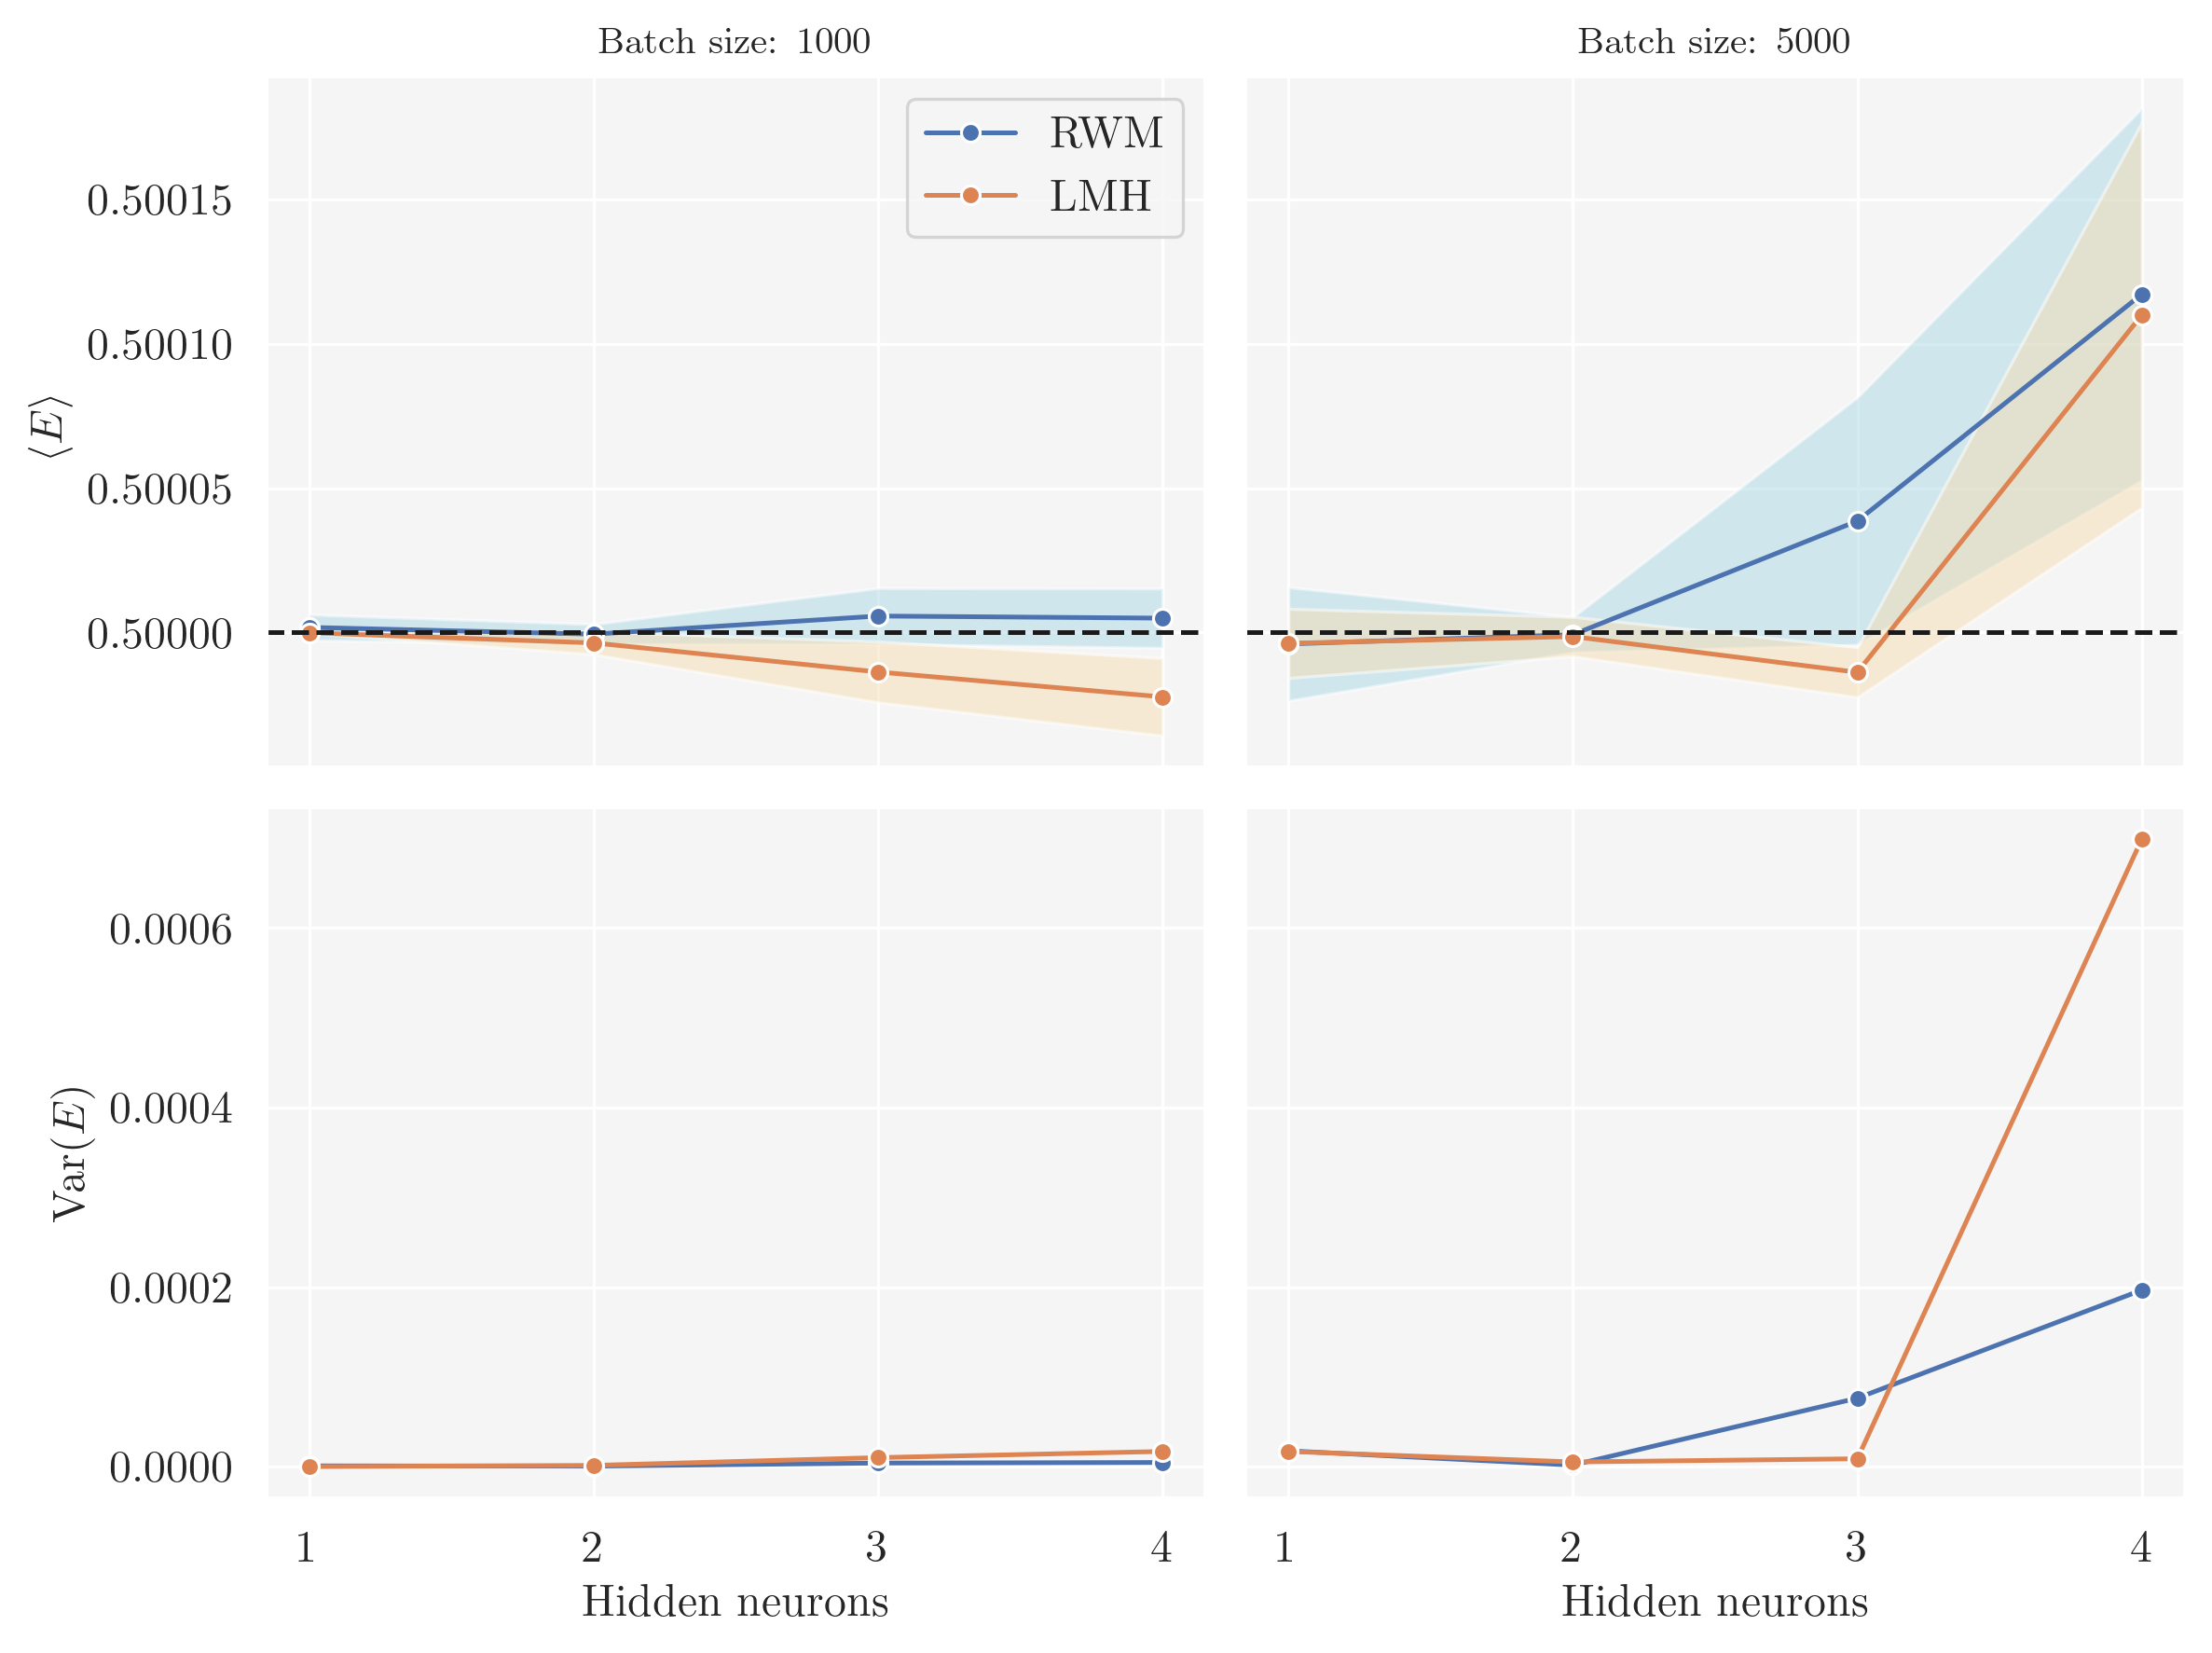

In [6]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         figsize=(8, 6), 
                         tight_layout=True,
                         sharex='col', #True,
                         sharey='row', #True,
                         dpi=150
                        )

#### Energy 

# RWM, 1000
sns.lineplot(data=df_rwm_1000, 
             x="nhidden",  
             y="energy", 
             marker="o",
             color='C0',
             label='RWM',
             ax=axes[0, 0]
            )
axes[0, 0].fill_between(df_rwm_1000["nhidden"],
                        df_rwm_1000["energy"] - df_rwm_1000["std_error"], 
                        df_rwm_1000["energy"] + df_rwm_1000["std_error"],
                        alpha=0.5,
                        facecolor='lightblue')

# LMH, 1000
sns.lineplot(data=df_lmh_1000, 
             x="nhidden",  
             y="energy", 
             marker="o",
             color='C1',
             label='LMH',
             ax=axes[0, 0]
            )
axes[0, 0].fill_between(df_lmh_1000["nhidden"],
                        df_lmh_1000["energy"] - df_lmh_1000["std_error"], 
                        df_lmh_1000["energy"] + df_lmh_1000["std_error"],
                        alpha=0.5,
                        facecolor='wheat')

# Ground truth
axes[0, 0].axhline(0.5, ls='--', color='k')

axes[0, 0].set(ylabel=r'$\langle E \rangle$', title=r'Batch size: 1000')
axes[0, 0].legend()

# RWM, 5000
sns.lineplot(data=df_rwm_5000, 
             x="nhidden",  
             y="energy", 
             marker="o",
             color='C0',
             ax=axes[0, 1]
            )
axes[0, 1].fill_between(df_rwm_5000["nhidden"],
                        df_rwm_5000["energy"] - df_rwm_5000["std_error"], 
                        df_rwm_5000["energy"] + df_rwm_5000["std_error"],
                        alpha=0.5,
                        facecolor='lightblue')

# LMH, 5000
# RWM, 5000
sns.lineplot(data=df_lmh_5000, 
             x="nhidden",  
             y="energy", 
             marker="o",
             color='C1',
             ax=axes[0, 1]
            )
axes[0, 1].fill_between(df_lmh_5000["nhidden"],
                        df_lmh_5000["energy"] - df_lmh_5000["std_error"], 
                        df_lmh_5000["energy"] + df_lmh_5000["std_error"],
                        alpha=0.5,
                        facecolor='wheat')

axes[0, 1].axhline(0.5, ls='--', color='k')

axes[0, 1].set(ylabel=r'', title=r'Batch size: 5000')



#### Variance

# RWM, 1000
sns.lineplot(data=df_rwm_1000, 
             x="nhidden", 
             y="variance",
             marker="o",
             color='C0',
             ax=axes[1, 0]
            )

# LMH, 1000
sns.lineplot(data=df_lmh_1000, 
             x="nhidden", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[1, 0]
            )

axes[1, 0].set(ylabel=r'$\mathrm{Var}(E)$', 
               xlabel=r'Hidden neurons', 
              )

# RWM, 5000
sns.lineplot(data=df_rwm_5000, 
             x="nhidden", 
             y="variance",
             marker="o",
             color='C0',
             ax=axes[1, 1]
            )

# LMH, 5000
sns.lineplot(data=df_lmh_5000, 
             x="nhidden", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[1, 1]
            )

axes[1, 1].set(ylabel=r'', 
               xlabel='Hidden neurons', 
              )

# Save figure
fig.savefig(fig_path("hidden_neurons_batch_size.pdf"), bbox_inches='tight')

## With RWM-LMH

In [7]:
df_rwm_lmh_1000 = pd.read_csv("../data/rwm_train_lmh_sample.csv")
df_rwm_lmh_1000

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.499996,0.000003,1.439205e-06,0.578640,1.195459e-06,1.772783e-08,6.852952e-09,0.000458,1,1,0.5,1.3,1,1,lmh,262144,500000,1000
1,0.499997,0.000003,6.252426e-07,0.578402,8.042957e-07,1.696297e-08,3.347776e-09,0.000217,1,1,0.5,1.3,1,2,lmh,262144,500000,1000
2,0.499990,0.000006,3.794304e-06,0.578941,1.895815e-06,2.902117e-08,1.555614e-08,0.000305,1,1,0.5,1.3,1,3,lmh,262144,500000,1000
3,0.499975,0.000012,1.638416e-05,0.580629,4.502016e-06,4.643319e-08,1.154927e-07,0.000271,1,1,0.5,1.3,1,4,lmh,262144,500000,1000


In [8]:
df_rwm_lmh_5000 = pd.read_csv("../data/rwm_train_lmh_sample2.csv")
df_rwm_lmh_5000

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.500003,0.000004,2.559889e-06,0.578227,1.062383e-06,9.092144e-09,4.682387e-09,0.000446,1,1,0.5,1.3,1,1,lmh,262144,500000,5000
1,0.499998,0.000001,2.058159e-07,0.578885,4.393171e-07,4.057117e-09,5.965843e-10,0.000270,1,1,0.5,1.3,1,2,lmh,262144,500000,5000
2,0.500016,0.000014,3.120012e-05,0.580010,6.688849e-06,6.469340e-08,1.325241e-07,0.000313,1,1,0.5,1.3,1,3,lmh,262144,500000,5000
3,0.500008,0.000016,3.247220e-05,0.579933,5.267746e-06,2.795212e-07,6.160144e-08,0.000221,1,1,0.5,1.3,1,4,lmh,262144,500000,5000


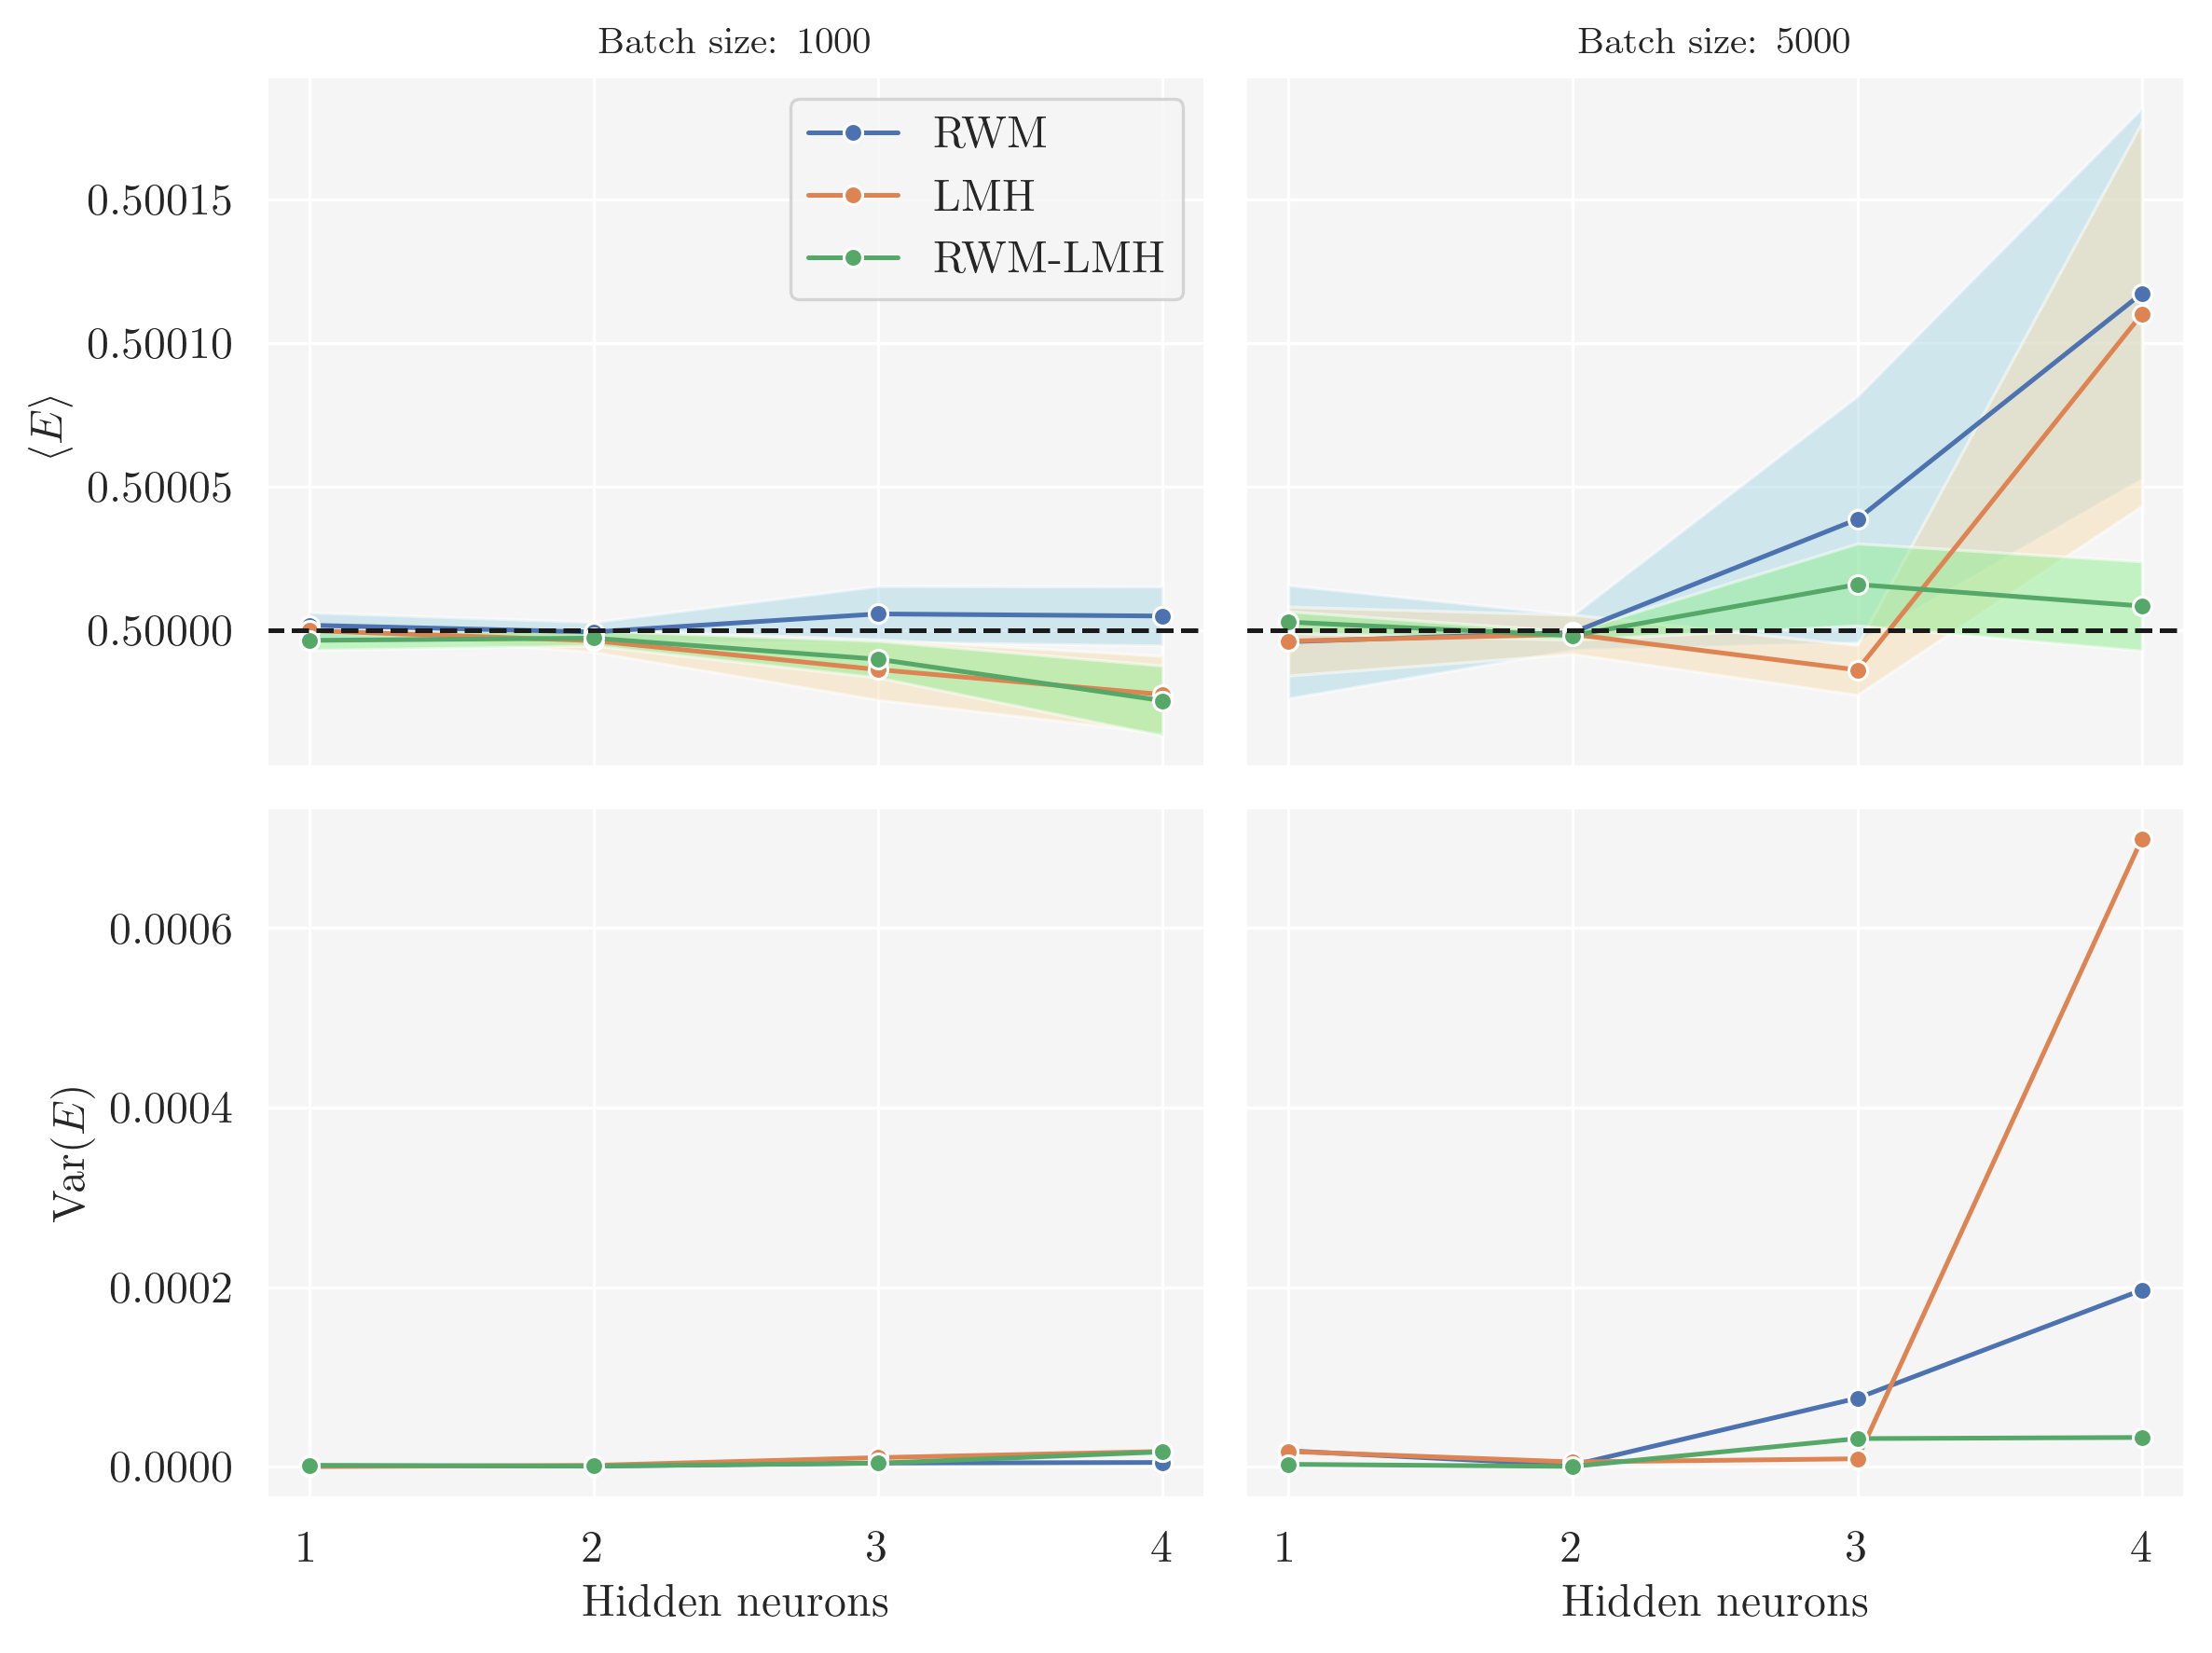

In [9]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         figsize=(8, 6), 
                         tight_layout=True,
                         sharex='col', #True,
                         sharey='row', #True,
                         dpi=150
                        )

#### Energy 

# RWM, 1000
sns.lineplot(data=df_rwm_1000, 
             x="nhidden",  
             y="energy", 
             marker="o",
             color='C0',
             label='RWM',
             ax=axes[0, 0]
            )
axes[0, 0].fill_between(df_rwm_1000["nhidden"],
                        df_rwm_1000["energy"] - df_rwm_1000["std_error"], 
                        df_rwm_1000["energy"] + df_rwm_1000["std_error"],
                        alpha=0.5,
                        facecolor='lightblue')

# LMH, 1000
sns.lineplot(data=df_lmh_1000, 
             x="nhidden",  
             y="energy", 
             marker="o",
             color='C1',
             label='LMH',
             ax=axes[0, 0]
            )
axes[0, 0].fill_between(df_lmh_1000["nhidden"],
                        df_lmh_1000["energy"] - df_lmh_1000["std_error"], 
                        df_lmh_1000["energy"] + df_lmh_1000["std_error"],
                        alpha=0.5,
                        facecolor='wheat')


# RWM-LMH, 1000
sns.lineplot(data=df_rwm_lmh_1000, 
             x="nhidden",  
             y="energy", 
             marker="o",
             color='C2',
             label='RWM-LMH',
             ax=axes[0, 0]
            )
axes[0, 0].fill_between(df_rwm_lmh_1000["nhidden"],
                        df_rwm_lmh_1000["energy"] - df_rwm_lmh_1000["std_error"], 
                        df_rwm_lmh_1000["energy"] + df_rwm_lmh_1000["std_error"],
                        alpha=0.5,
                        facecolor='lightgreen')

# Ground truth
axes[0, 0].axhline(0.5, ls='--', color='k')

axes[0, 0].set(ylabel=r'$\langle E \rangle$', title=r'Batch size: 1000')
axes[0, 0].legend()

# RWM, 5000
sns.lineplot(data=df_rwm_5000, 
             x="nhidden",  
             y="energy", 
             marker="o",
             color='C0',
             ax=axes[0, 1]
            )
axes[0, 1].fill_between(df_rwm_5000["nhidden"],
                        df_rwm_5000["energy"] - df_rwm_5000["std_error"], 
                        df_rwm_5000["energy"] + df_rwm_5000["std_error"],
                        alpha=0.5,
                        facecolor='lightblue')

# LMH, 5000
sns.lineplot(data=df_lmh_5000, 
             x="nhidden",  
             y="energy", 
             marker="o",
             color='C1',
             ax=axes[0, 1]
            )
axes[0, 1].fill_between(df_lmh_5000["nhidden"],
                        df_lmh_5000["energy"] - df_lmh_5000["std_error"], 
                        df_lmh_5000["energy"] + df_lmh_5000["std_error"],
                        alpha=0.5,
                        facecolor='wheat')


# RWM-LMH, 5000
sns.lineplot(data=df_rwm_lmh_5000, 
             x="nhidden",  
             y="energy", 
             marker="o",
             color='C2',
             ax=axes[0, 1]
            )
axes[0, 1].fill_between(df_rwm_lmh_5000["nhidden"],
                        df_rwm_lmh_5000["energy"] - df_rwm_lmh_5000["std_error"], 
                        df_rwm_lmh_5000["energy"] + df_rwm_lmh_5000["std_error"],
                        alpha=0.5,
                        facecolor='lightgreen')

axes[0, 1].axhline(0.5, ls='--', color='k')

axes[0, 1].set(ylabel=r'', title=r'Batch size: 5000')



#### Variance

# RWM, 1000
sns.lineplot(data=df_rwm_1000, 
             x="nhidden", 
             y="variance",
             marker="o",
             color='C0',
             ax=axes[1, 0]
            )

# LMH, 1000
sns.lineplot(data=df_lmh_1000, 
             x="nhidden", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[1, 0]
            )

# RWM-LMH, 1000
sns.lineplot(data=df_rwm_lmh_1000, 
             x="nhidden", 
             y="variance",
             marker="o",
             color='C2',
             ax=axes[1, 0]
            )


axes[1, 0].set(ylabel=r'$\mathrm{Var}(E)$', 
               xlabel=r'Hidden neurons', 
              )

# RWM, 5000
sns.lineplot(data=df_rwm_5000, 
             x="nhidden", 
             y="variance",
             marker="o",
             color='C0',
             ax=axes[1, 1]
            )

# LMH, 5000
sns.lineplot(data=df_lmh_5000, 
             x="nhidden", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[1, 1]
            )

# RWM-LMH, 5000
sns.lineplot(data=df_rwm_lmh_5000, 
             x="nhidden", 
             y="variance",
             marker="o",
             color='C2',
             ax=axes[1, 1]
            )

axes[1, 1].set(ylabel=r'', 
               xlabel='Hidden neurons', 
              )

# Save figure
fig.savefig(fig_path("hidden_neurons_batch_size_extra.pdf"), bbox_inches='tight')